In [291]:
#!/usr/bin/env python

#Safir Mikhail 18.02.2021 

import os
import json
import random
import time
import numpy
import math
import matplotlib.pyplot as plt
from IPython.display import clear_output

%matplotlib inline

In [300]:
class Settings:
    devices = 10 # Number of devices in the simulation
    signal_per_device_gain = 150 
    signal_per_device_zone = 100
    end_x = 800
    end_y = 800
    
settings = Settings()

In [383]:
class Device:
    device_id = 0
    x = 0
    y = 0
    device_type = "mobile" #tower
    in_zone = False

In [427]:
class Draw:

    def draw_once(self, devices):
        plt.figure(figsize=(10, 10))
        fig = plt.gcf()
        ax = fig.gca()
        
        for i in range(0, len(devices)):
            ax.add_artist(plt.Circle((devices[i].x, devices[i].y), settings.signal_per_device_zone, color='r', fill=False))
            
        for i in range(0, len(devices)):
            plt.plot(devices[i].x, devices[i].y, 'o', color="blue")
            plt.text(devices[i].x, devices[i].y+25, str(devices[i].device_id), fontdict=None, horizontalalignment='center', verticalalignment='center')

        plt.plot(0, 0, 'o')
        plt.plot(1000, 1000, 'o')
        
        plt.title("Routing")
        plt.grid(False)
        plt.show();

    
    def draw(self, points):
        
        clear_output(wait=True)
        plt.figure(figsize=(10, 10))
        
        
        fig = plt.gcf()
        ax = fig.gca()
        
        for i in range(0, len(points[0])):
            ax.add_artist(plt.Circle((points[0][i], points[1][i]), settings.signal_per_device_zone, color='r', fill=False))

        plt.plot(points[0], points[1], 'o')
        plt.plot(0, 0, 'o')
        plt.plot(1000, 1000, 'o')
        
        plt.title("Routing")
        plt.grid(False)
        plt.show();

In [499]:
class Generator:
    
    def collision(self, devices):
        collision_main = {}
        for i in range(0, len(devices)):
            device_current = devices[i]
            collision_array = [device_current.device_id, []]
            for j in range(0, len(devices)):
                device_to_reach = devices[j]
                if (device_current == device_to_reach):
                    continue;
                distance = math.sqrt( ((int(device_current.x)-int(device_to_reach.x))**2)+((int(device_current.y)-int(device_to_reach.y))**2) )
                    
                if (distance < (settings.signal_per_device_zone * 2)):
                    collision_array[1].append(device_to_reach.device_id)
                    print("device " + str(device_current.device_id) + " reached " + str(device_to_reach.device_id) + " with dis " + str(distance))

            if (len(collision_array[1]) > 0):
                collision_main[device_current.device_id] = collision_array[1]
        return collision_main
    
    def walk(self, points):
        start_points_x = []
        start_points_y = []
        for i in range(0, len(points[0])):
            now_x = points[0][i]
            now_y = points[1][i]
            x, y = random.randint(-3, 3), random.randint(-3, 3)
            now_x += x
            now_y += y
            start_points_x.append(now_x)
            start_points_y.append(now_y)
        return [start_points_x, start_points_y]
            
    
    def start(self):
        devices = [] #Device array with classes
        
        for i in range(0, settings.devices):
            x, y = random.randint(100, settings.end_x),  random.randint(100, settings.end_y)
            
            device = Device()
            device.device_id = i
            device.x = x
            device.y = y
            
            devices.append(device)
            
        return devices
        pass

In [505]:
class Router:
    
    generator = Generator()
    draw = Draw()
    devices = []
    graph = {}
    
    def build(self):
        plt.ion()
        devices = self.generator.start()
        self.draw.draw_once(devices)
        self.graph = self.generator.collision(devices)
        
#         while True:
#             points = self.generator.walk(points)
#             self.draw.draw(points)
#             plt.pause(0.5)
        pass
    
    def start(self):
        self.build()
        pass

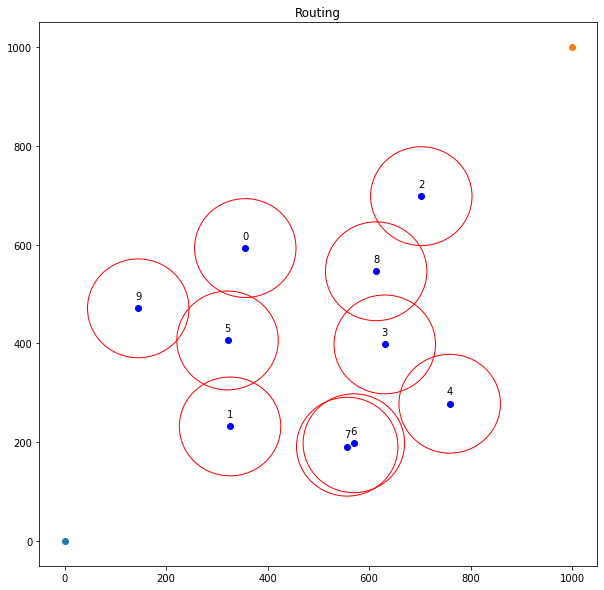

device 0 reached 5 with dis 190.24720760105785
device 1 reached 5 with dis 174.07182425654074
device 2 reached 8 with dis 176.13914953808538
device 3 reached 4 with dis 175.45369759569047
device 3 reached 8 with dis 148.9731519435633
device 4 reached 3 with dis 175.45369759569047
device 5 reached 0 with dis 190.24720760105785
device 5 reached 1 with dis 174.07182425654074
device 5 reached 9 with dis 187.61929538296428
device 6 reached 7 with dis 14.7648230602334
device 7 reached 6 with dis 14.7648230602334
device 8 reached 2 with dis 176.13914953808538
device 8 reached 3 with dis 148.9731519435633
device 9 reached 5 with dis 187.61929538296428
{0: [5], 1: [5], 2: [8], 3: [4, 8], 4: [3], 5: [0, 1, 9], 6: [7], 7: [6], 8: [2, 3], 9: [5]}


In [512]:
router = Router() # call public class
settings.devices = 10
settings.signal_per_device_zone = 100
router.start()

print(router.graph)

In [507]:
def dfs_paths(graph, start, goal):
    stack = [(start, [start])]  # (vertex, path)
    while stack:
        (vertex, path) = stack.pop()
        for next in set(graph[vertex]) - set(path):
            if next == goal:
                yield path + [next]
            else:
                stack.append((next, path + [next]))

In [513]:
print(list(dfs_paths(router.graph, 4, 2)))

[[4, 3, 8, 2]]
